## Group: The Order of the PyTorch
### Milestone 1

- Members: Onur Buyukkalkan, Yi-Huai Chang, Diyanet Nijiati

- Project: Costa Rica Household Poverty Prediction

https://www.kaggle.com/competitions/costa-rican-household-poverty-prediction/overview 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Initial Exploration

In [20]:
#Load and Explore the Data
data = pd.read_csv('train.csv')
print(data.head())
print(data.describe())

             Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  ...  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0     0  ...          100    1849               1        100             0   
1     0  ...          144    4489               1        144             0   
2     0  ...          121    8464               1          0             0   
3     0  ...           81     289              16        121             4   
4     0  ...          121    1369              16        121             4   

   SQBovercrowding  SQBdependency  SQBmeaned  agesq  Tar

In [21]:
#Checking Shape and NA Values Across Columns
print("Data shape:", data.shape)

print(data.isnull().sum())

Data shape: (9557, 143)
Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64


In [22]:
#Counts of the Target Labels
print(data['Target'].value_counts())

Target
4    5996
2    1597
3    1209
1     755
Name: count, dtype: int64


## Step 2: Plotting

We should now visualize the data

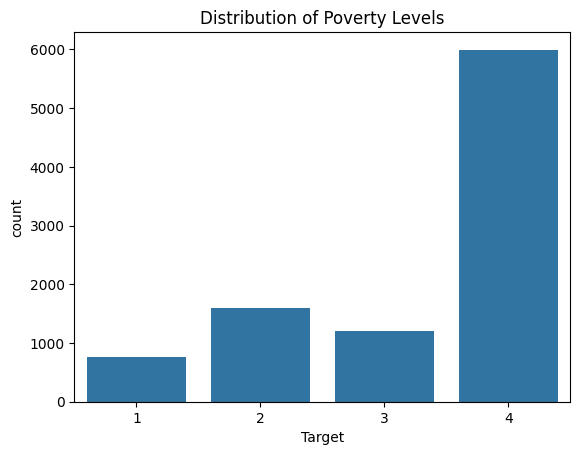

In [23]:
# Plotting the distribution of the poverty levels
sns.countplot(x='Target', data=data)
plt.title('Distribution of Poverty Levels')
plt.show()

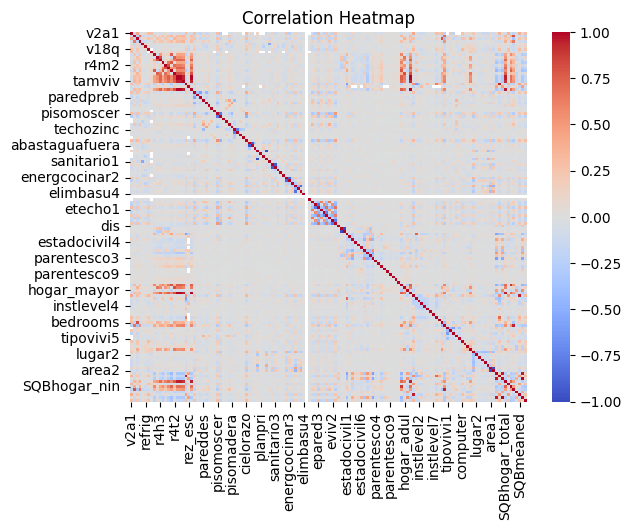

In [26]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])  # np.number covers integers and floats

# Now compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Step 3: Data Cleaning

We can fill n/a values with mean for consistency or maybe just drop all n/a values.

## Step 4: Feature Selection

The features that are available to us are described here: https://www.kaggle.com/competitions/costa-rican-household-poverty-prediction/data

We have a number of different features from material amenities like toilet and source of electricity to household characteristics like disability, number of kids, years in education etc. These are indirect features that might reflect the quality of life for these households.

We can use the outside wall material, roof material, number of tablets owned, toilet situation, electricity source etc. We can also create children to adult ratio, income per children, income per person in household, but we do not have income data. We can therefore find replacements that will still represent the level of income. 

#### Potential New Features 

- **Ratio of Children to Adults**: This can highlight households that may be under more financial strain.

- **Dependency Ratio**: Although it’s already provided, checking for its accurate calculation or recalculating might be useful if there are any discrepancies.

- **Asset Index**: Create a composite score based on the presence of assets (e.g., refrigerator, computer, tablet, TV) and home characteristics (types of walls, floors, and roof materials). This score can serve as a proxy for economic status.

- **Educational Level Index**: A score representing the overall educational attainment within the household.

#### Limitations

- Underreporting or overreporting to get financial assistance.
- Lack of monetary income and asset reported.
- Dimensionality problem might arise if we fail to find the most important features and eliminate the lesser important ones.

In [28]:
#Trying Out Indexes

# Example of creating an Asset Index
data['asset_index'] = (data['refrig'] + data['v18q'] + data['computer'] + data['television'] + data['mobilephone']).astype(int)

# Example of creating an Educational Level Index
data['education_index'] = (data['instlevel1'] + data['instlevel2']*2 + data['instlevel3']*3 + data['instlevel4']*4 + data['instlevel5']*5 + data['instlevel6']*6 + data['instlevel7']*7 + data['instlevel8']*8 + data['instlevel9']*9)
